In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [ ]:
cols = ["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("magic04.data" , names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df.tail()

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist class  
19015    2.8766   2.4229  106.8258     h  
19016   -2.9632  86.7975  247.4560     h  
19017   -9.4662  30.2987  256.5166     h  
19018  -63.8389  84.6874  408.3166     h  
19019   31.4755  52.7310  272.3174     h

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df["class"] =  le.fit_transform(df["class"])

In [ ]:
df.head()
df.tail()

fLength   fWidth   fSize   fConc  fConc1     fAsym   fM3Long  \
19015   21.3846  10.9170  2.6161  0.5857  0.3934   15.2618   11.5245   
19016   28.9452   6.7020  2.2672  0.5351  0.2784   37.0816   13.1853   
19017   75.4455  47.5305  3.4483  0.1417  0.0549   -9.3561   41.0562   
19018  120.5135  76.9018  3.9939  0.0944  0.0683    5.8043  -93.5224   
19019  187.1814  53.0014  3.2093  0.2876  0.1539 -167.3125 -168.4558   

       fM3Trans   fAlpha     fDist  class  
19015    2.8766   2.4229  106.8258      1  
19016   -2.9632  86.7975  247.4560      1  
19017   -9.4662  30.2987  256.5166      1  
19018  -63.8389  84.6874  408.3166      1  
19019   31.4755  52.7310  272.3174      1

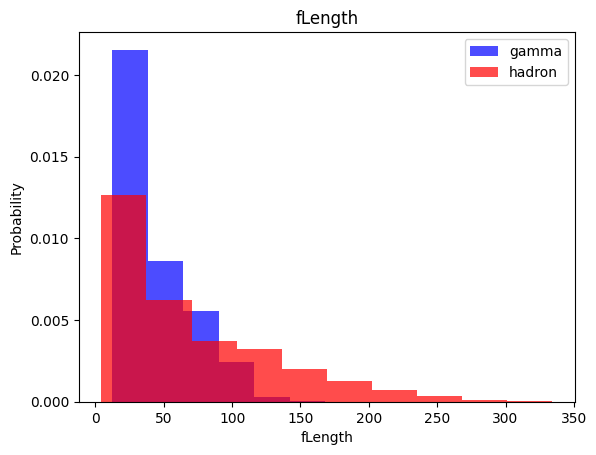

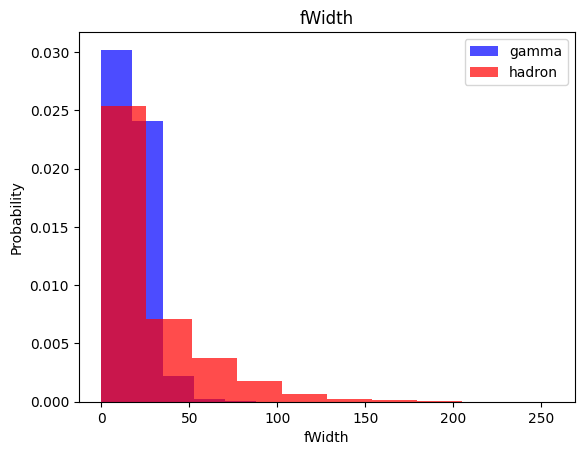

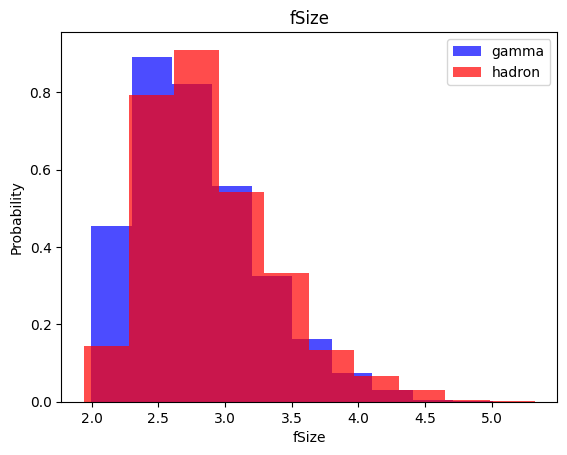

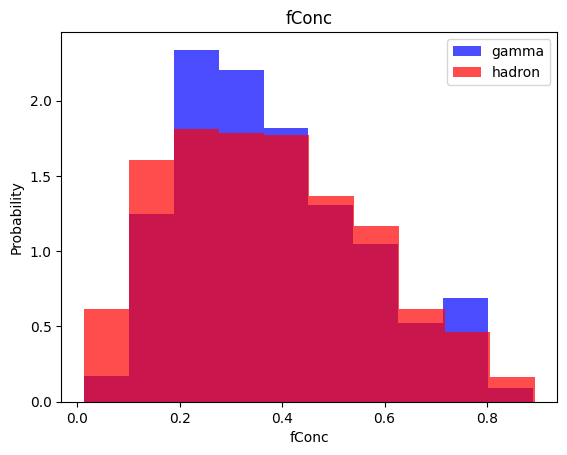

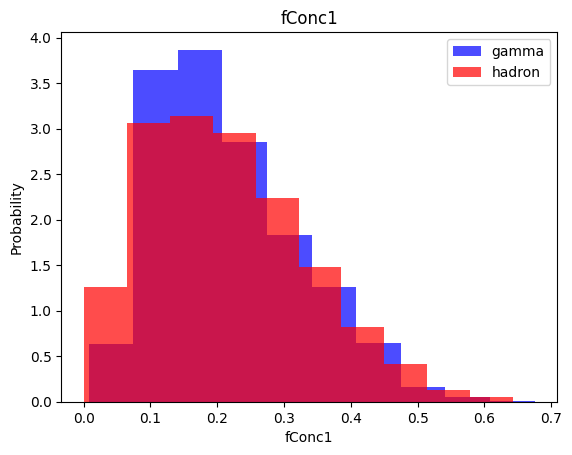

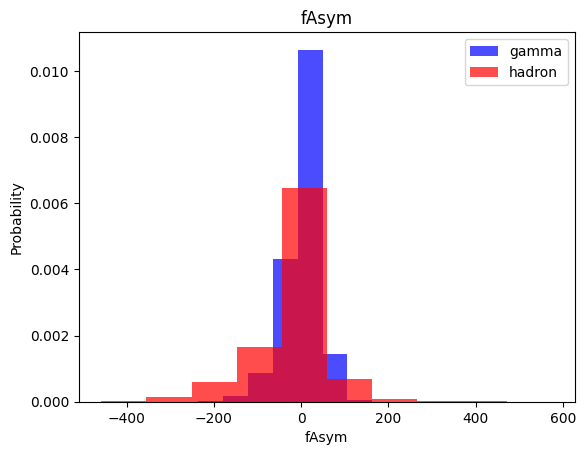

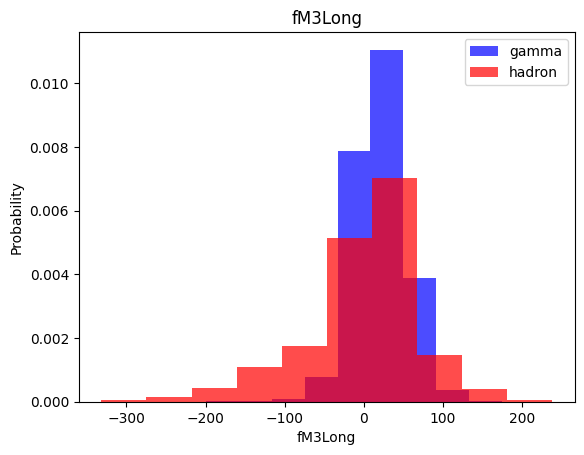

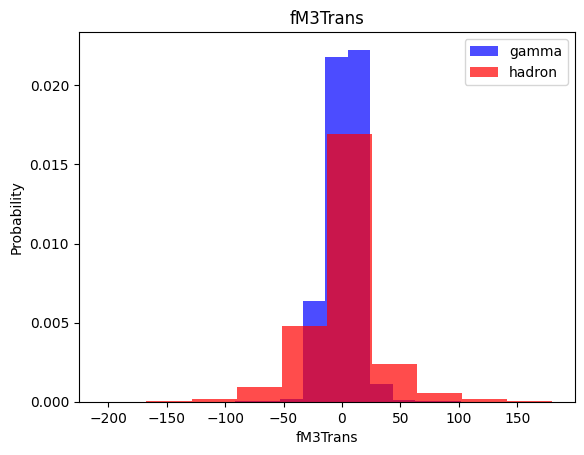

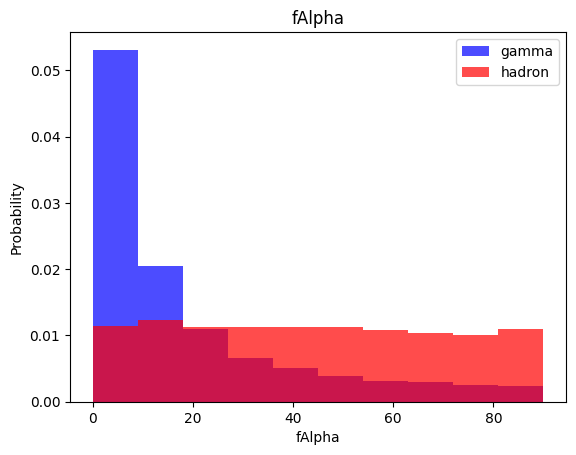

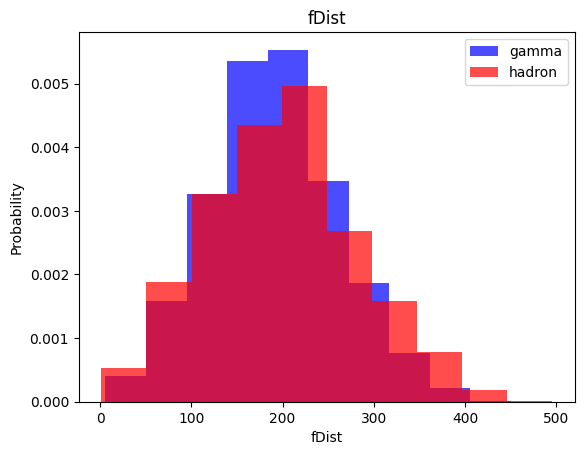

In [ ]:
for label in df.columns[:-1]:
    plt.hist(df[df["class"] == 0][label], color = 'blue' , label = 'gamma', alpha = 0.7, density = True)
    plt.hist(df[df["class"] == 1][label], color = 'red' , label = 'hadron' , alpha = 0.7, density = True)
    ##Density = True -> Normalizes the data being compared and y label will be probability
    ##Alpha -> Transparency
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

Train, Validation and Test datasets

In [ ]:
train, valid, test = np.split(df.sample(frac = 1),[int(0.6*len(df)), int(0.8*len(df))])
## df.sample is shuffling the data randomly,the frac=1 parameter means you are sampling the entire DataFrame.
## np.split -> this function is used to split an array into multiple sub-arrays.
## int(0.6)*len(df) -> 60 percent of dataset is train dataset
## from 0.6 to 0.8 times df -> 20 percent dataset is validation dataset
## from 0.8 to 1 times df -> 20 percent dataset is a test dataset

In [ ]:
print(len(train[train["class"] == 0]))
print(len(train[train["class"] == 1]))

7445
3967


As you can see the number of gamma and hadron is not similar therefore we need to oversample the data

In [ ]:
def scale_dataset(dataframe , oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    sc = StandardScaler()
    X = sc.fit_transform(X)

    ##Oversampling
    if oversample :
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    ##Take 2 arrays and horizantally stack them together. Since dimensions of X and y are diff i.e  2d and 1d we need to reshape y
    data = np.hstack((X,np.reshape(y,(-1,1))))

    return X,y,data

In [ ]:
X_train, y_train , train = scale_dataset(train, oversample = True)
X_valid, y_valid , valid = scale_dataset(valid, oversample = False)
X_test, y_test , test = scale_dataset(test, oversample = False)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report ## report of the model that sklearn offers

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 15)
knn_model = knn_model.fit(X_train, y_train)

In [ ]:
y_pred = knn_model.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      2469
           1       0.79      0.72      0.76      1335

    accuracy                           0.84      3804
   macro avg       0.83      0.81      0.82      3804
weighted avg       0.83      0.84      0.83      3804



# **NAIVE BAYES**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)

In [ ]:
y_pred = nb_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
y_test

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.90      0.81      2469
           1       0.68      0.40      0.50      1335

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logr_model = LogisticRegression()
logr_model = logr_model.fit(X_train, y_train)

In [ ]:
y_pred = logr_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2469
           1       0.70      0.71      0.71      1335

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



## **SVM**

In [ ]:
from sklearn.svm import SVC ##SUPPORT VECTOR CLASSIFIER

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      2469
           1       0.81      0.79      0.80      1335

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# **NEURAL NET**

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history (history):
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 5))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend ()
  ax1.grid (True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.legend()
  ax2.grid (True)



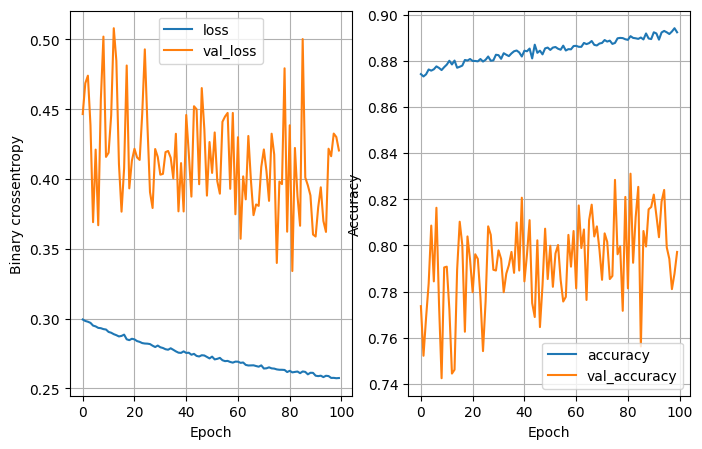

In [ ]:
plot_history(history)

In [ ]:
def train_model (X_train, y_train , num_nodes, dropout_prob , lr, batch_size, epochs):
  nn_model = tf.keras.Sequential([
      tf.keras.layers.Dense(num_nodes, activation = 'relu', input_shape = (10,)),
      tf.keras.layers.Dropout(dropout_prob), ## prevents overfitting
      tf.keras.layers.Dense(num_nodes, activation = 'relu'),
      tf.keras.layers.Dropout(dropout_prob),
      tf.keras.layers.Dense(1, activation = 'sigmoid')
  ])

  nn_model.compile(optimizer = tf.keras.optimizers.Adam(0.001), loss = 'binary_crossentropy',
                  metrics=['accuracy'])


  history = nn_model.fit(
      X_train, y_train, epochs = epochs, batch_size = batch_size , validation_split = 0.2 , verbose = 0
      ) ## verbose will not print anything

  return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32
119/119 [==============================] - 0s 1ms/step - loss: 0.3191 - accuracy: 0.8709
16 nodes, dropout 0, lr 0.1, batch size 64
119/119 [==============================] - 0s 1ms/step - loss: 0.3177 - accuracy: 0.8730
16 nodes, dropout 0, lr 0.1, batch size 128
119/119 [==============================] - 0s 1ms/step - loss: 0.3209 - accuracy: 0.8688
16 nodes, dropout 0, lr 0.005, batch size 32
119/119 [==============================] - 0s 1ms/step - loss: 0.3180 - accuracy: 0.8720
16 nodes, dropout 0, lr 0.005, batch size 64
119/119 [==============================] - 0s 2ms/step - loss: 0.3248 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.005, batch size 128
119/119 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8683
16 nodes, dropout 0, lr 0.001, batch size 32
119/119 [==============================] - 0s 1ms/step - loss: 0.3179 - accuracy: 0.8733
16 nodes, dropout 0, lr 0.001, batch size 64
119/119 [============

<ipython-input-57-12b11482ff39>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1,2, figsize = (8, 5))


119/119 [==============================] - 0s 2ms/step - loss: 0.3222 - accuracy: 0.8693
32 nodes, dropout 0, lr 0.005, batch size 32
119/119 [==============================] - 0s 1ms/step - loss: 0.3277 - accuracy: 0.8696
32 nodes, dropout 0, lr 0.005, batch size 64
119/119 [==============================] - 0s 1ms/step - loss: 0.3255 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.005, batch size 128
119/119 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8659
32 nodes, dropout 0, lr 0.001, batch size 32
119/119 [==============================] - 0s 2ms/step - loss: 0.3273 - accuracy: 0.8688
32 nodes, dropout 0, lr 0.001, batch size 64
119/119 [==============================] - 0s 1ms/step - loss: 0.3152 - accuracy: 0.8701
32 nodes, dropout 0, lr 0.001, batch size 128
119/119 [==============================] - 0s 1ms/step - loss: 0.3227 - accuracy: 0.8709
32 nodes, dropout 0.2, lr 0.1, batch size 32
119/119 [==============================] - 0s 2ms/step - los

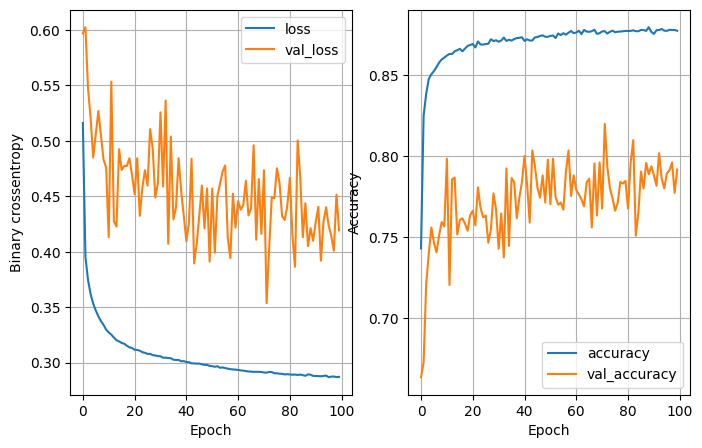

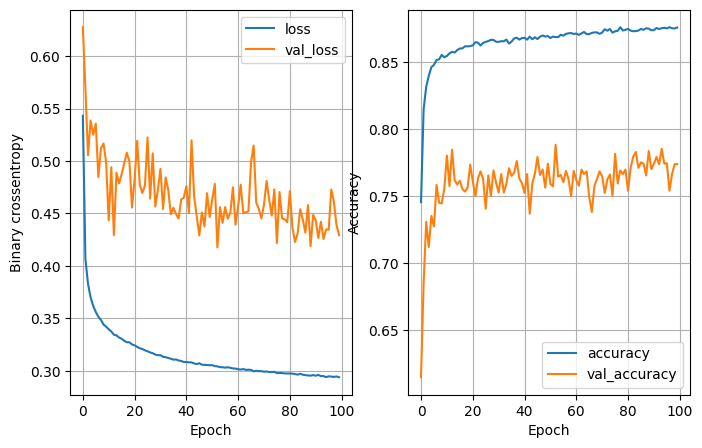

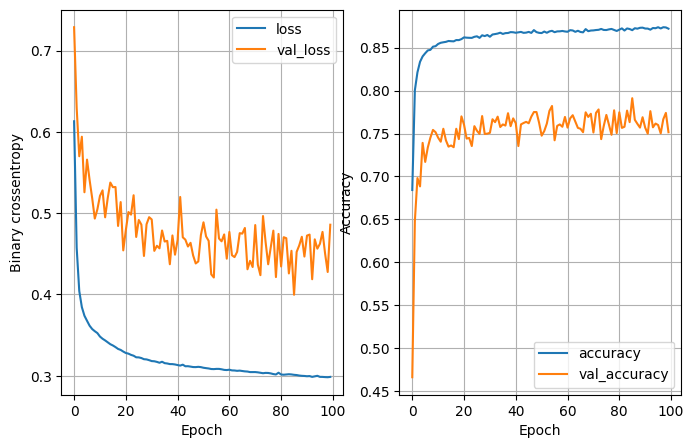

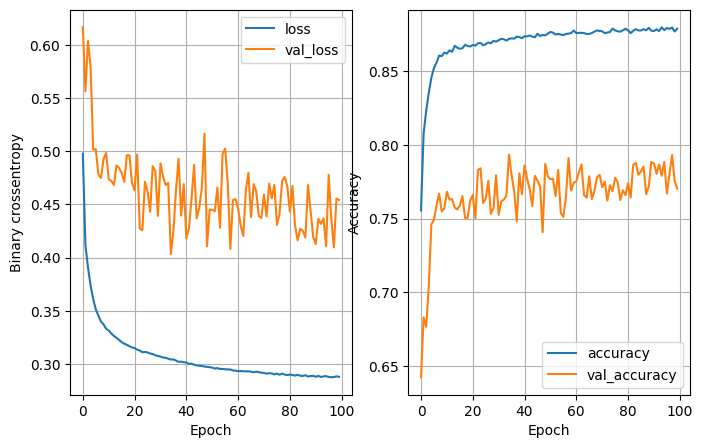

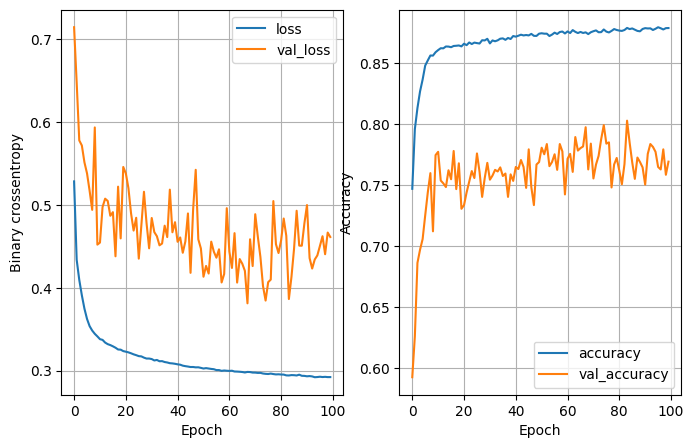

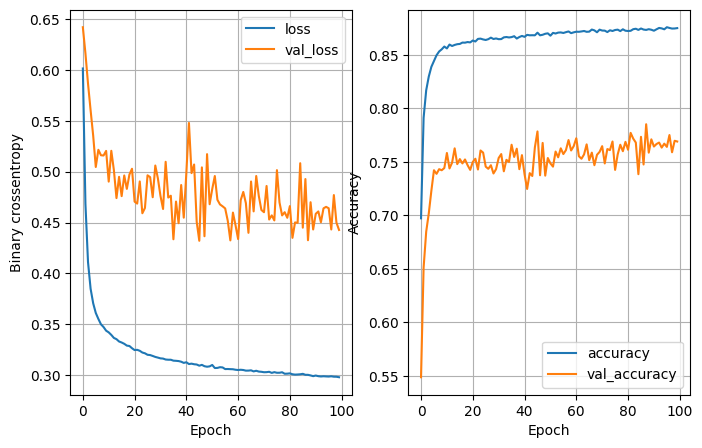

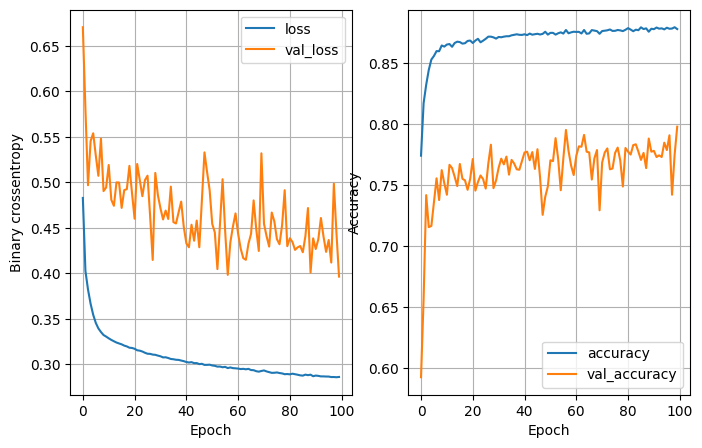

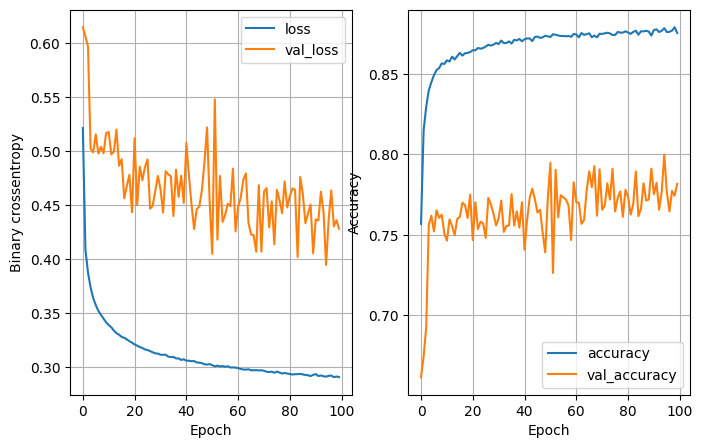

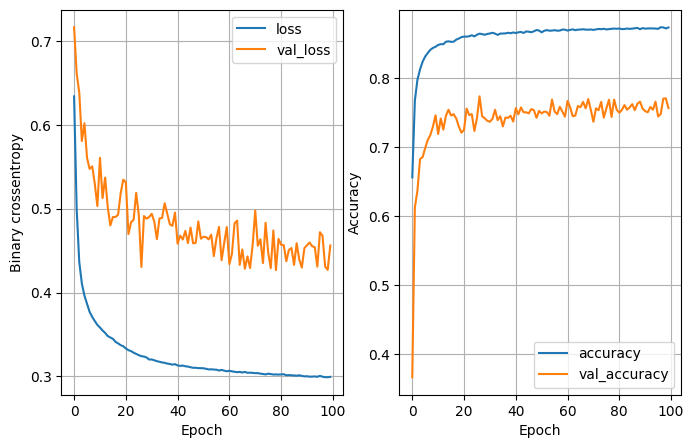

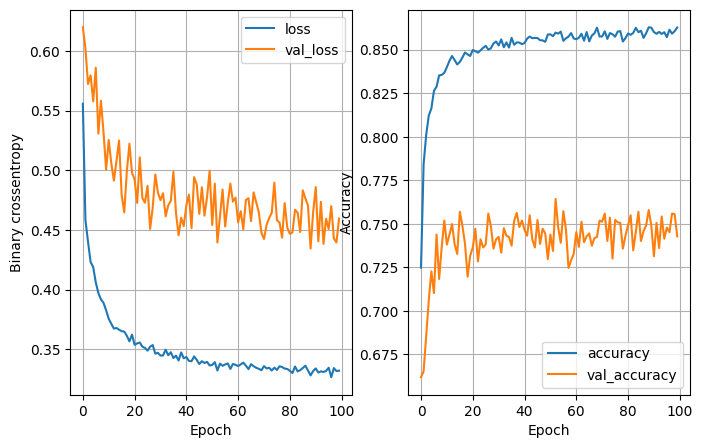

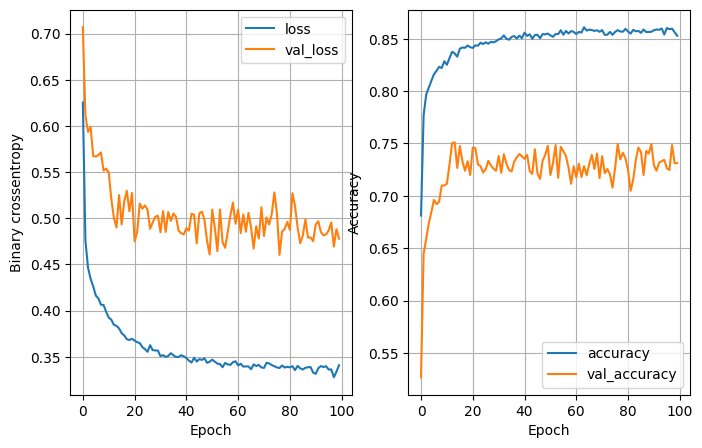

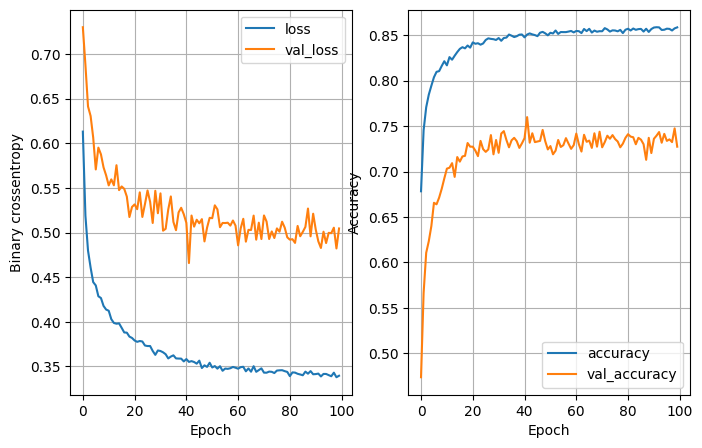

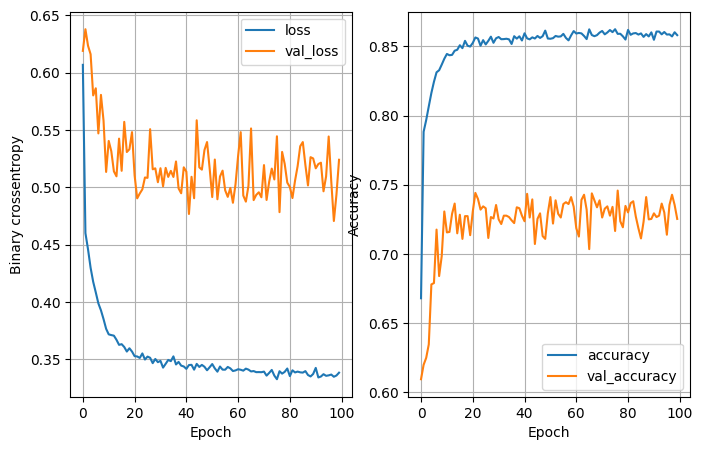

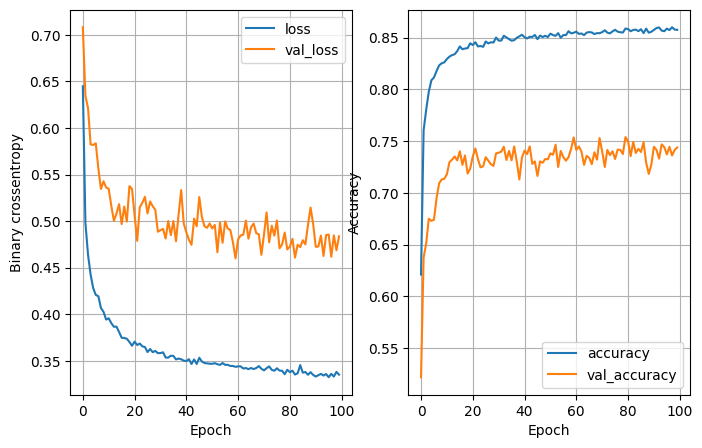

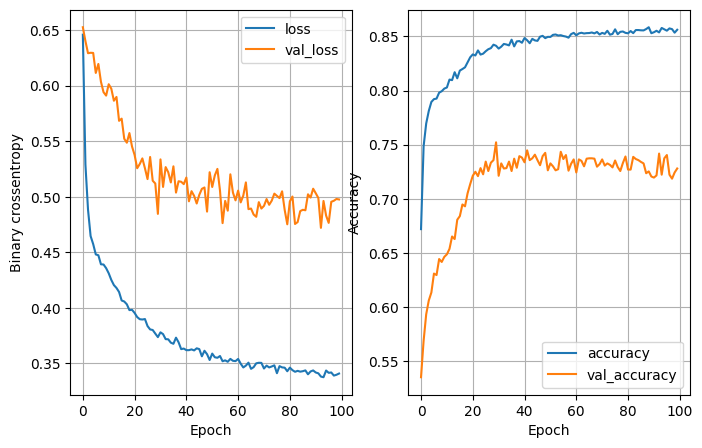

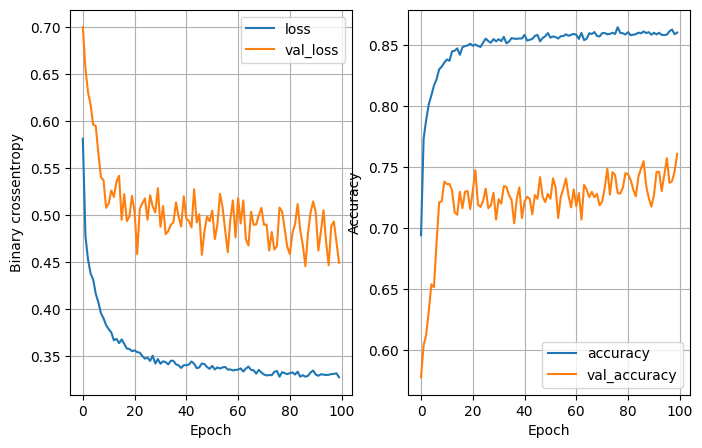

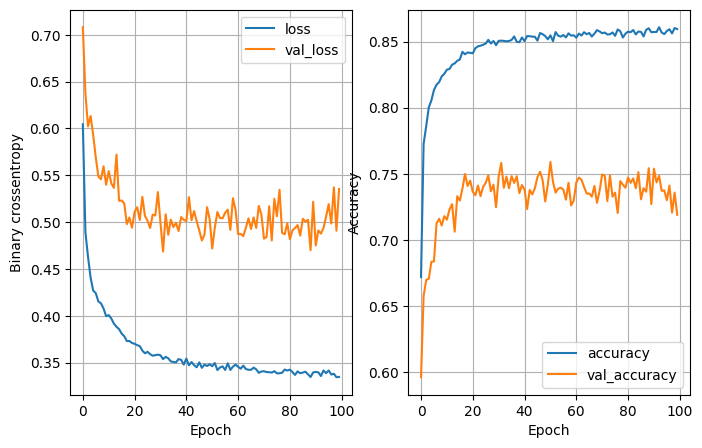

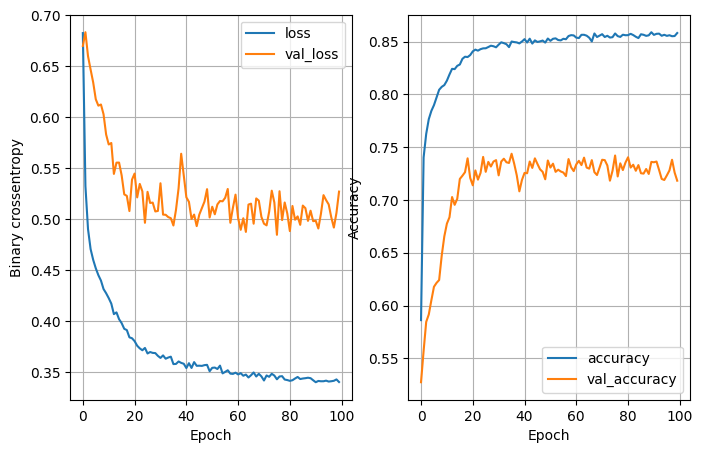

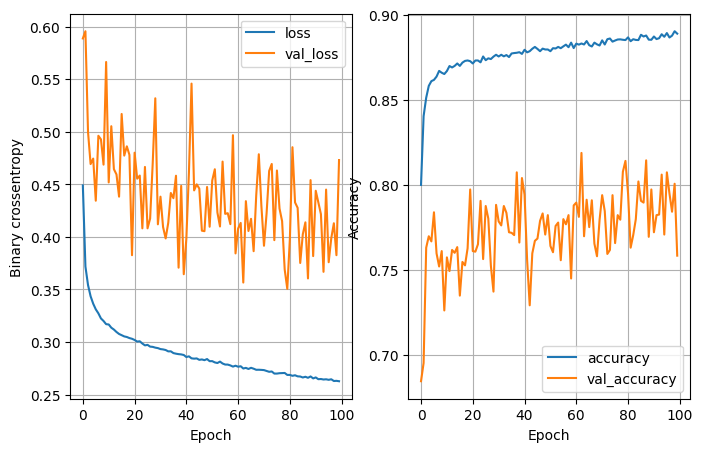

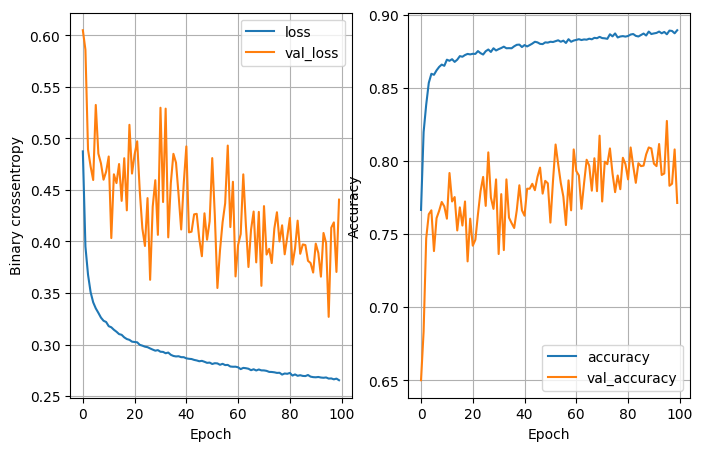

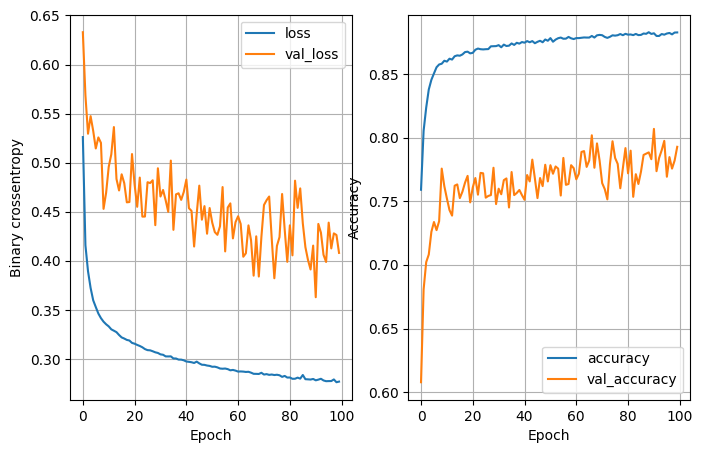

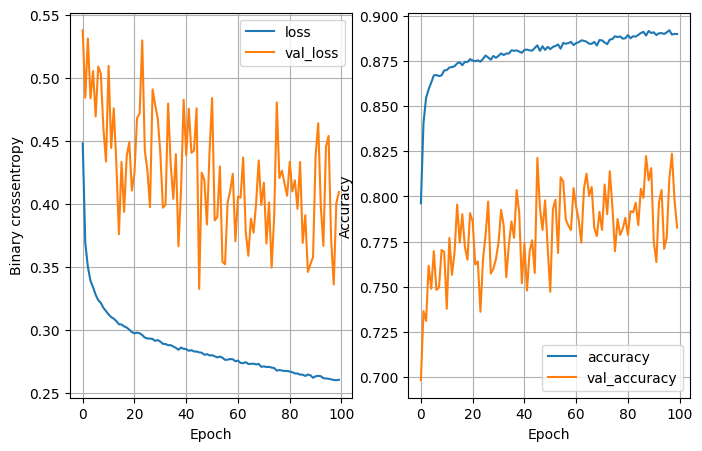

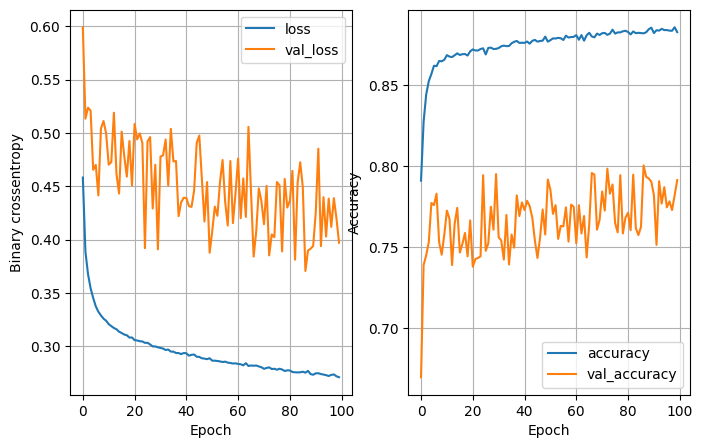

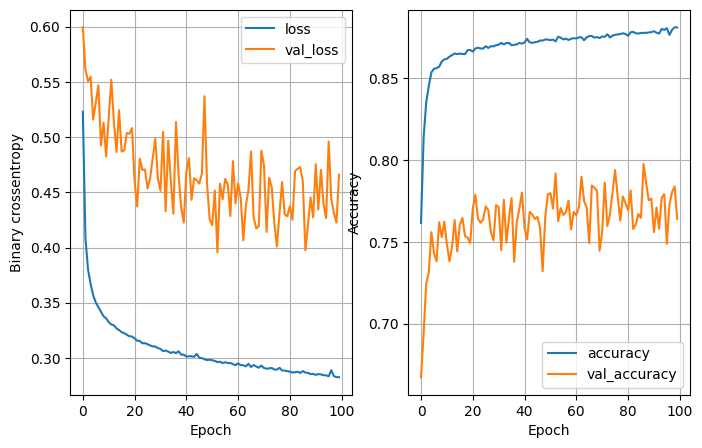

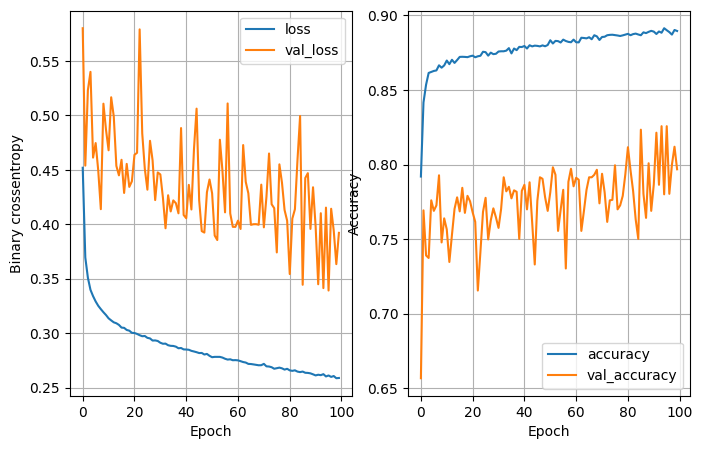

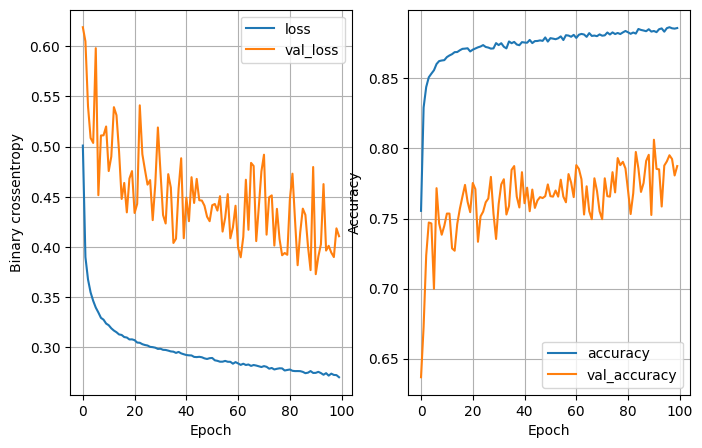

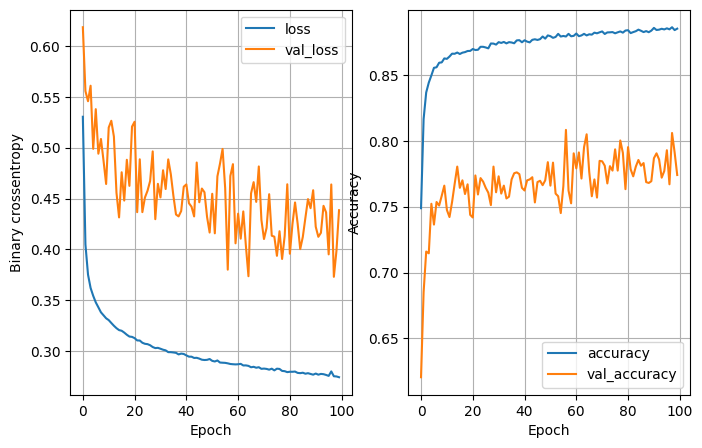

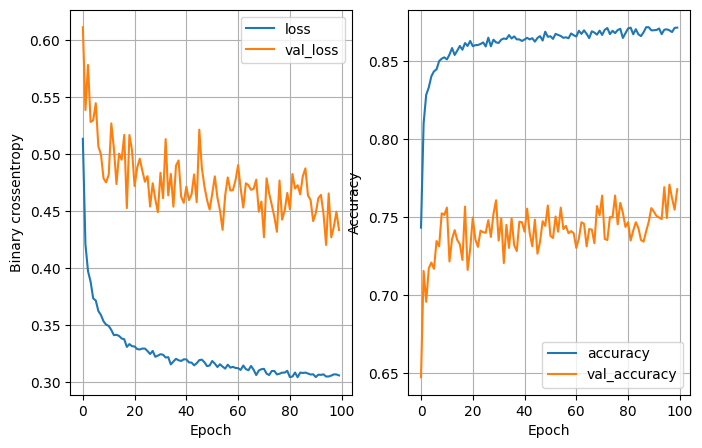

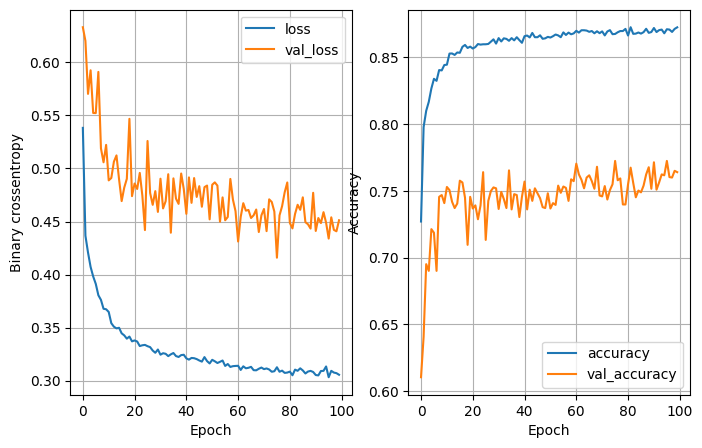

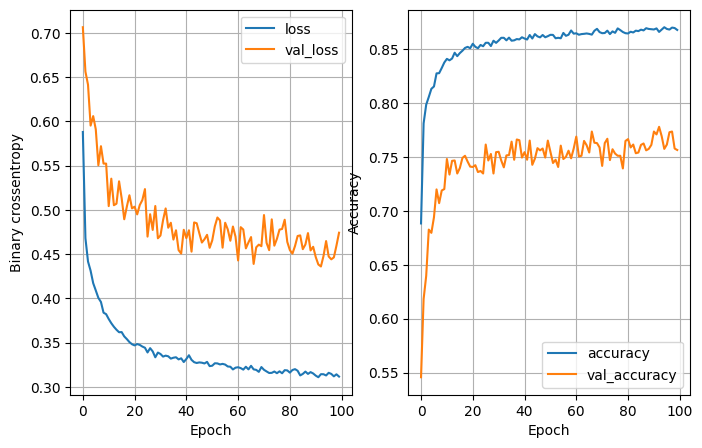

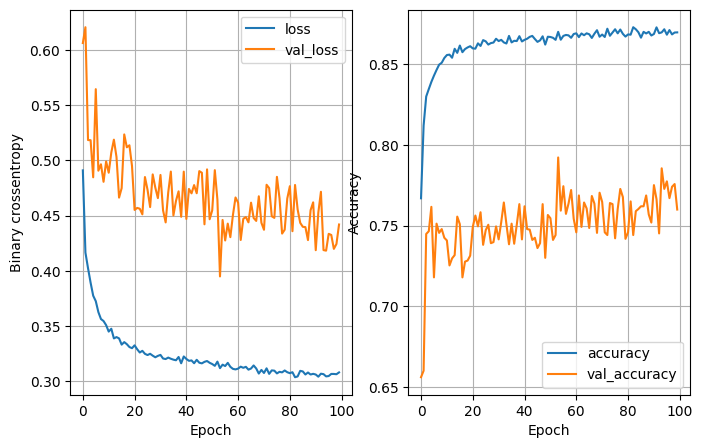

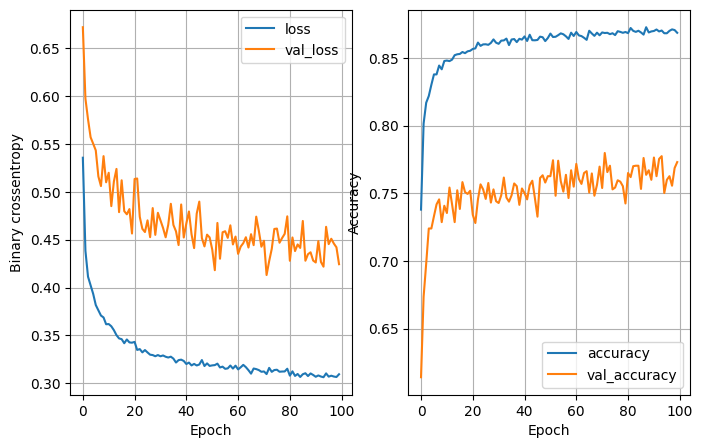

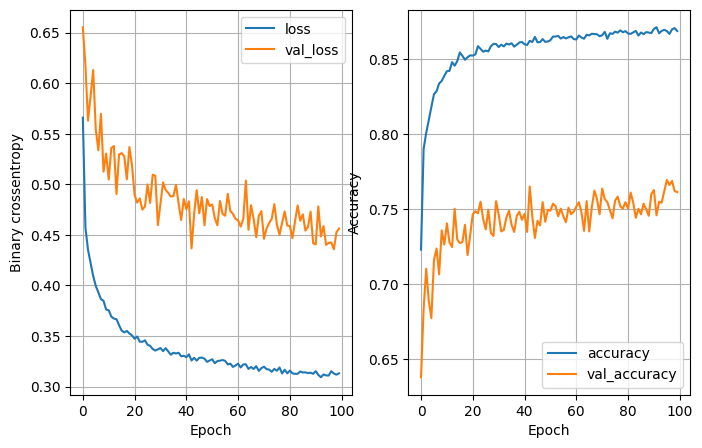

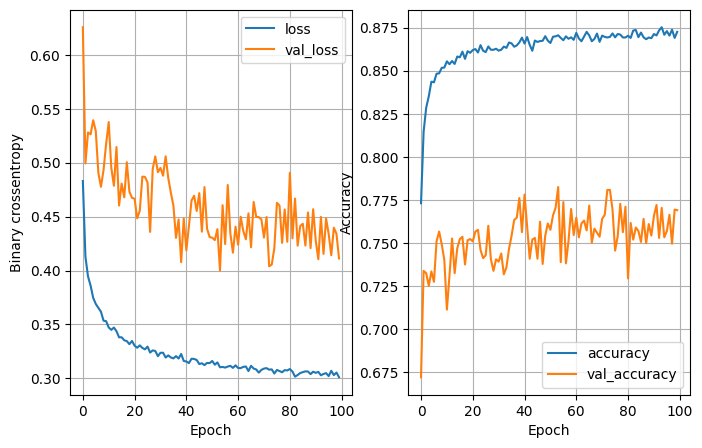

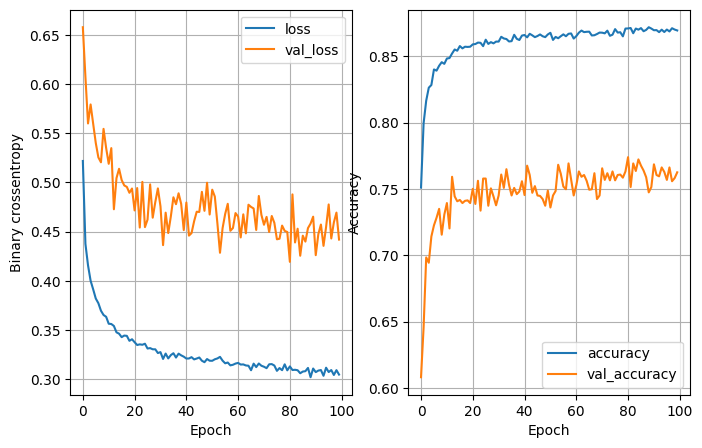

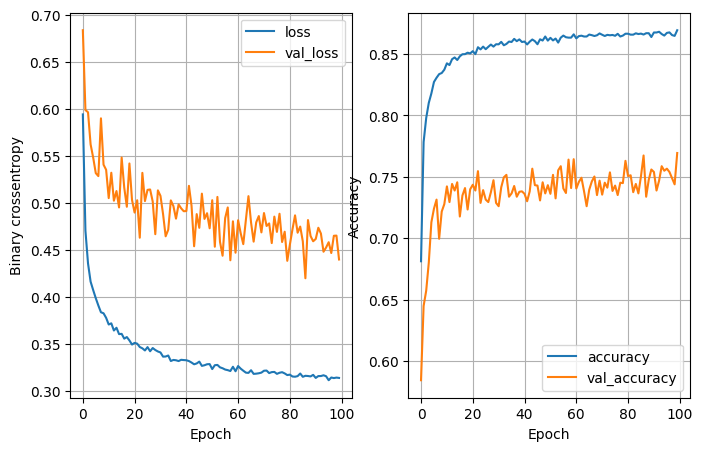

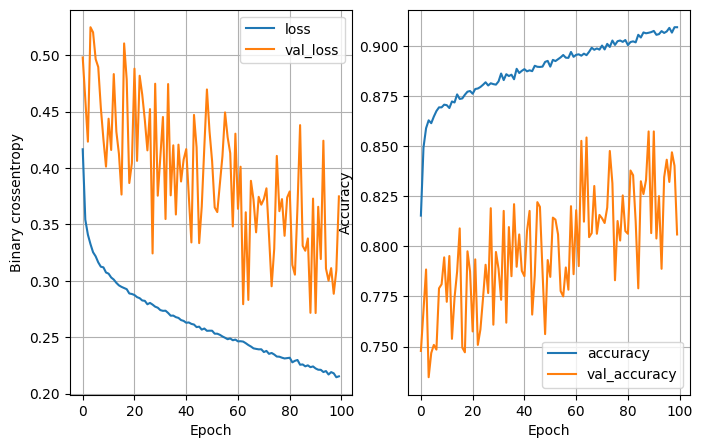

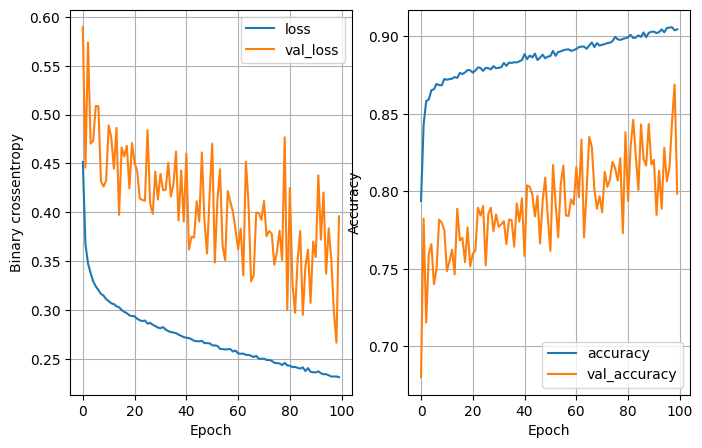

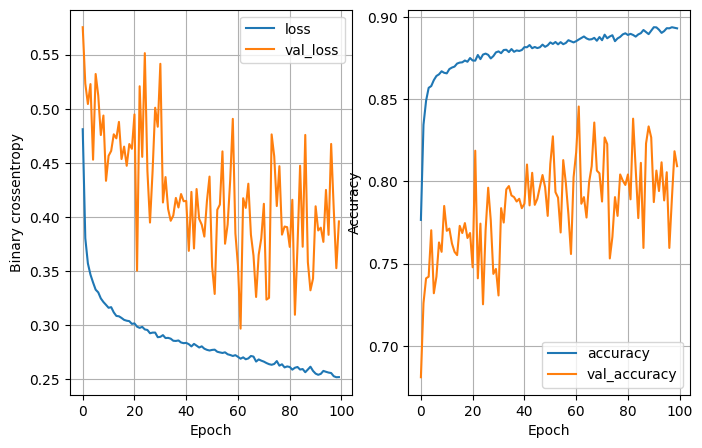

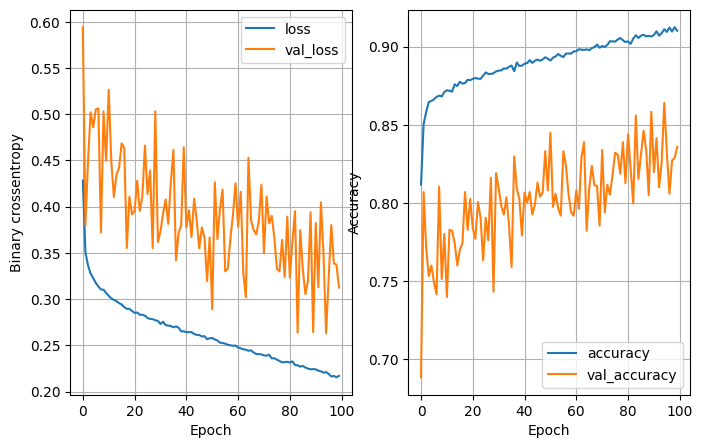

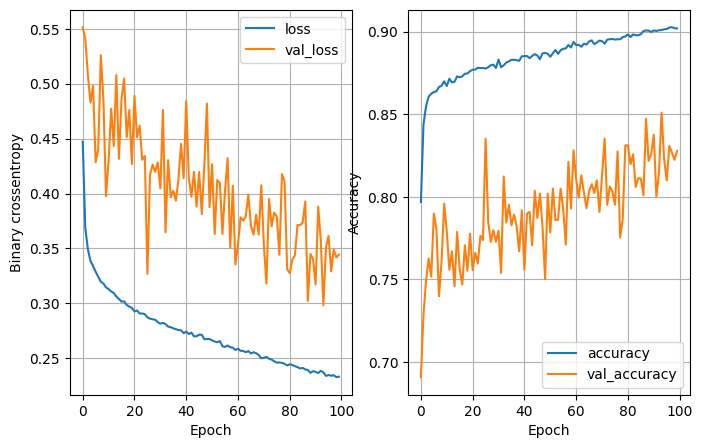

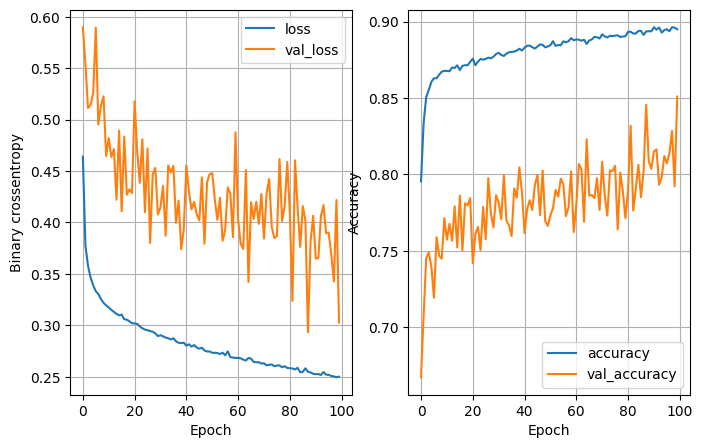

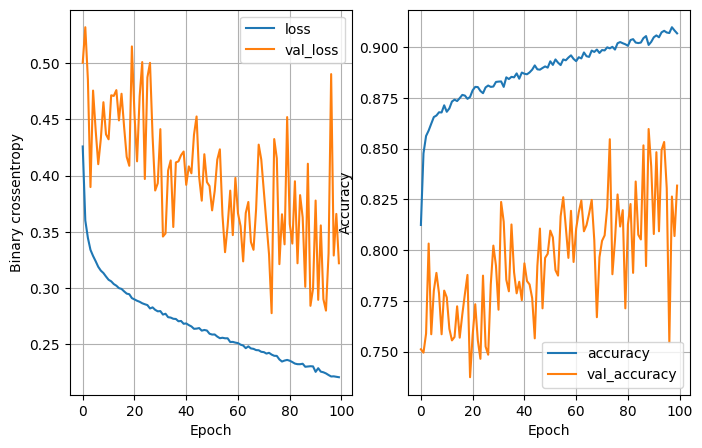

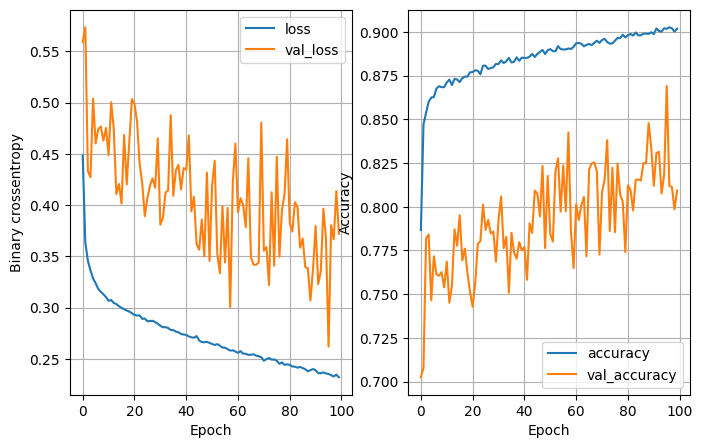

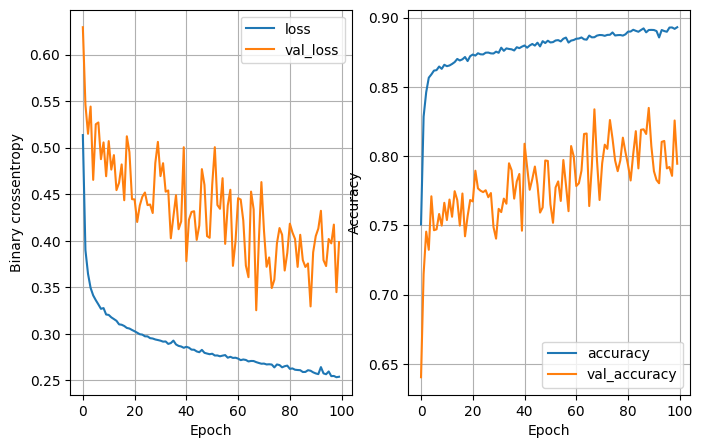

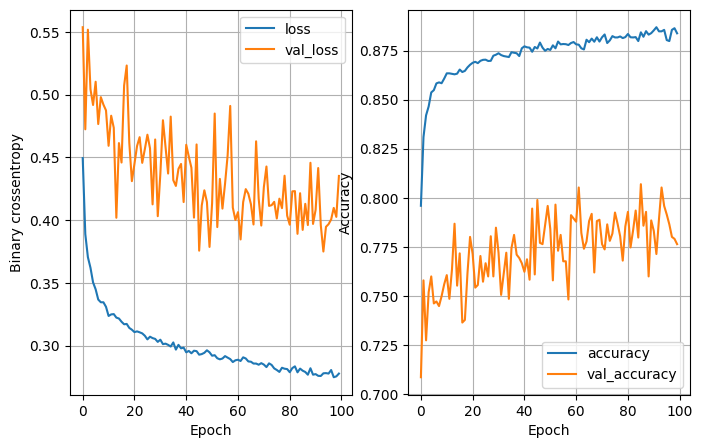

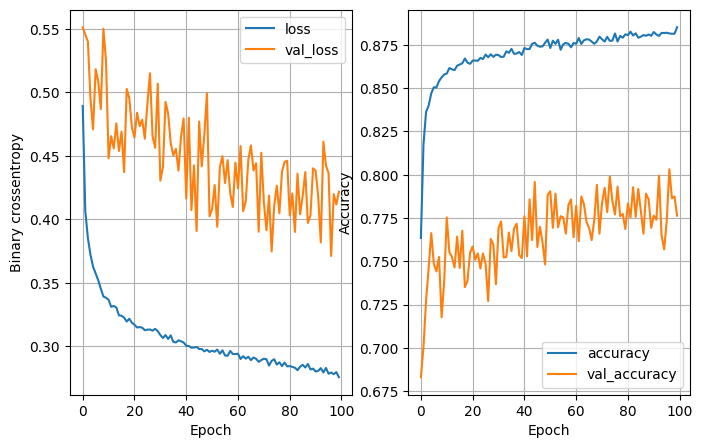

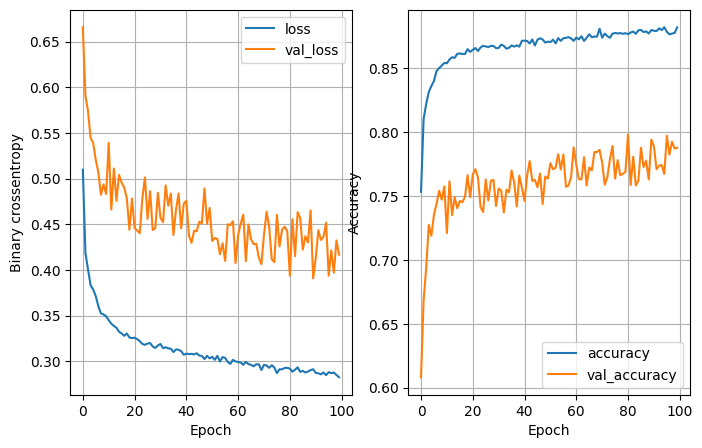

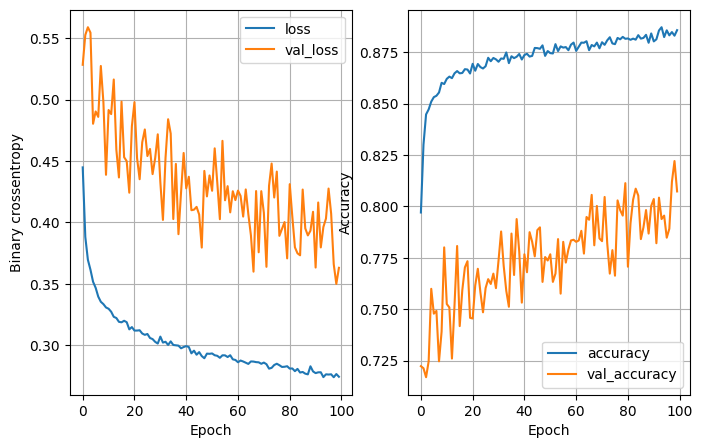

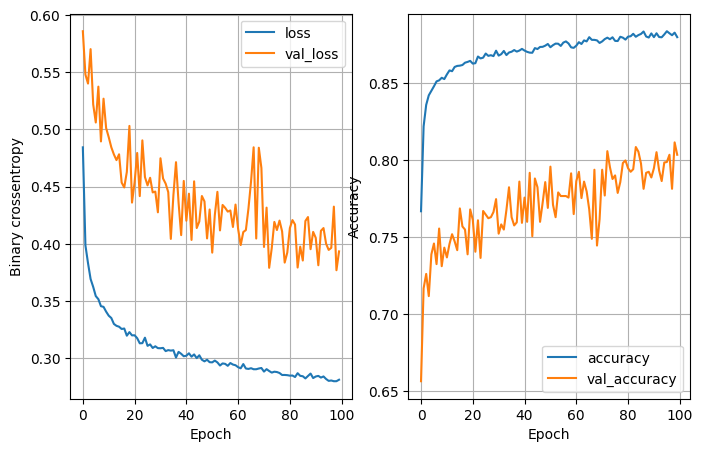

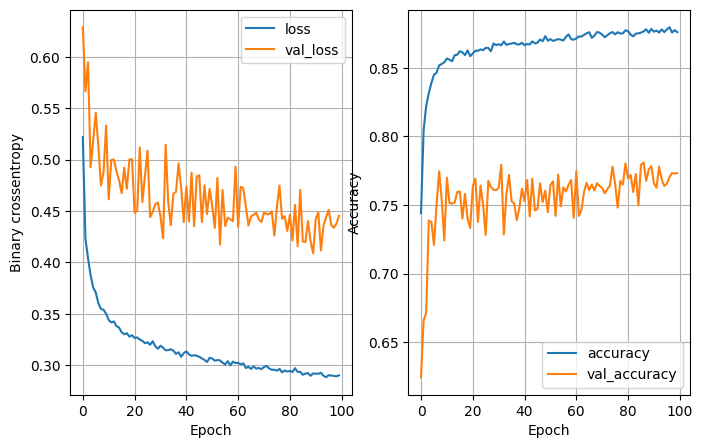

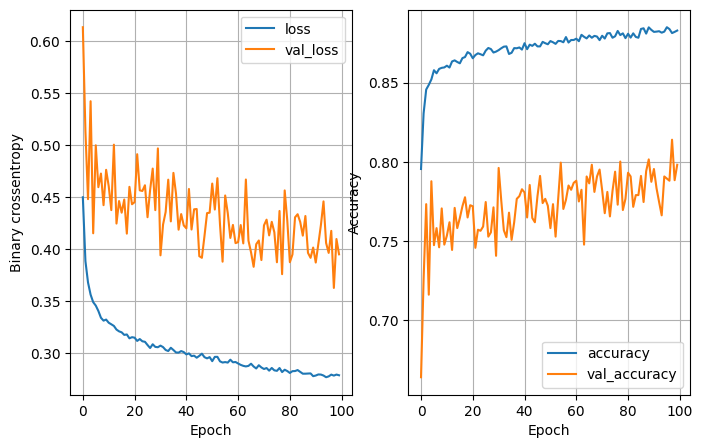

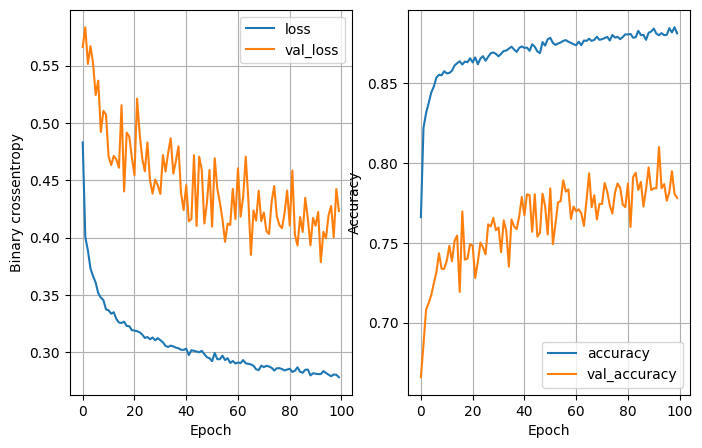

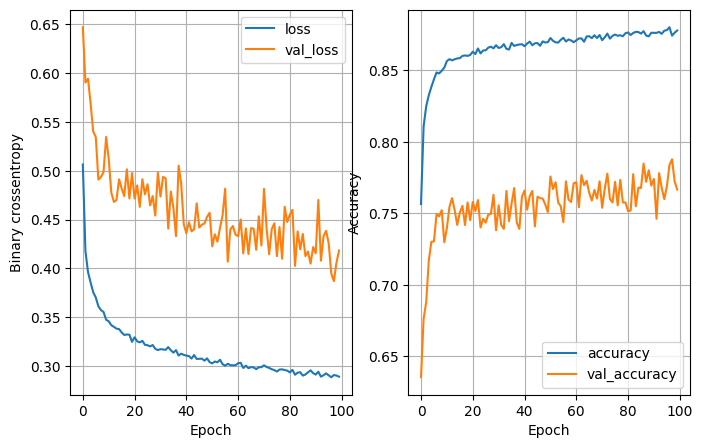

In [ ]:
least_val_loss = float('inf') ##setting to infinity
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plot_history(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model